## Coding a softmax classifier from scratch


The goal of this workbook is to experience the training of a softmax classifier.

In [ ]:
# Importing required libraries
from google.colab import drive
drive.mount('/content/drive')

import random
import numpy as np
from drive.MyDrive.Colab_Notebooks.C247.hw2_code.utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

Mounted at /content/drive


In [ ]:
# Loading CIFAR data
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2022-01-23 19:07:59--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  16.4MB/s    in 11s     

2022-01-23 19:08:11 (14.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Loads the CIFAR-10 dataset from disk and performs preprocessing to prepare
    it for the linear classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/content/cifar-10-batches-py' # You need to update this line
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Training a softmax classifier.

Let us build a softmax classifier.  We will implement its loss function, then subsequently train it with gradient descent.  Finally, we will choose the learning rate of gradient descent to optimize its classification performance.

In [ ]:
from drive.MyDrive.Colab_Notebooks.C247.hw2_code.nndl import Softmax

In [ ]:
# Let us seclare an instance of the Softmax class.  
# Weights are initialized to a random value.

np.random.seed(1)

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

softmax = Softmax(dims=[num_classes, num_features])

#### Softmax loss

In [ ]:
# Let us implement the loss function of the softmax in softmax.py using a for loop over
# the number of examples

loss = softmax.loss(X_train, y_train)

In [ ]:
print(loss)

2.327760702804874


## Remark

This loss makes sense: the weights are initialized following a normal distribution, and since they have not been "trained" yet, the probability returned for each example is 1 over the number of classes. Since the loss takes the negative log of that, we get -log(1/10) which is about 2.3. 

#### Softmax gradient

In [ ]:
# Let us calculate the gradient of the softmax loss in the Softmax class.
# For convenience, we'll write one function that computes the loss and gradient together, softmax.loss_and_grad(X, y)

loss, grad = softmax.loss_and_grad(X_dev,y_dev)

# Let us compare our gradient to a gradient check we wrote. 
softmax.grad_check_sparse(X_dev, y_dev, grad)

numerical: 1.687024 analytic: 1.687024, relative error: 4.205210e-09
numerical: 1.313274 analytic: 1.313274, relative error: 2.627594e-08
numerical: -0.087627 analytic: -0.087627, relative error: 1.317066e-07
numerical: 0.763658 analytic: 0.763658, relative error: 1.415027e-08
numerical: 2.674501 analytic: 2.674501, relative error: 3.200923e-08
numerical: 1.315712 analytic: 1.315712, relative error: 2.235074e-08
numerical: -0.846340 analytic: -0.846340, relative error: 5.982007e-08
numerical: -2.865396 analytic: -2.865396, relative error: 7.817729e-09
numerical: 1.306817 analytic: 1.306817, relative error: 1.828673e-08
numerical: -3.006702 analytic: -3.006702, relative error: 2.871144e-08


## A vectorized version of Softmax

To speed things up, we will vectorize the loss and gradient calculations.  This will be helpful for stochastic gradient descent.

In [ ]:
import time

In [ ]:
# Let us implement softmax.fast_loss_and_grad which calculates the loss and gradient WITHOUT using any for loops.  

# Standard loss and gradient
tic = time.time()
loss, grad = softmax.loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Normal loss / grad_norm: {} / {} computed in {}s'.format(loss, np.linalg.norm(grad, 'fro'), toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax.fast_loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Vectorized loss / grad: {} / {} computed in {}s'.format(loss_vectorized, np.linalg.norm(grad_vectorized, 'fro'), toc - tic))

# The losses should match but our vectorized implementation should be much faster.
print('difference in loss / grad: {} /{} '.format(loss - loss_vectorized, np.linalg.norm(grad - grad_vectorized)))

Normal loss / grad_norm: 2.321719836811929 / 356.09503020338445 computed in 0.43520283699035645s
Vectorized loss / grad: 2.321719836811928 / 356.09503020338445 computed in 0.02209186553955078s
difference in loss / grad: 8.881784197001252e-16 /2.5538120364623587e-13 


## Stochastic gradient descent

We now implement stochastic gradient descent.

iteration 0 / 1500: loss 2.3365926606637544
iteration 100 / 1500: loss 2.0557222613850827
iteration 200 / 1500: loss 2.035774512066282
iteration 300 / 1500: loss 1.9813348165609885
iteration 400 / 1500: loss 1.9583142443981614
iteration 500 / 1500: loss 1.8622653073541355
iteration 600 / 1500: loss 1.8532611454359387
iteration 700 / 1500: loss 1.8353062223725827
iteration 800 / 1500: loss 1.829389246882764
iteration 900 / 1500: loss 1.8992158530357481
iteration 1000 / 1500: loss 1.9783503540252303
iteration 1100 / 1500: loss 1.8470797913532635
iteration 1200 / 1500: loss 1.8411450268664082
iteration 1300 / 1500: loss 1.79104024957921
iteration 1400 / 1500: loss 1.870580302938226
That took 9.662902116775513s


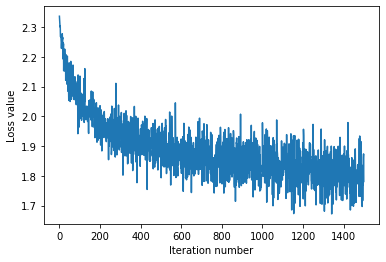

In [ ]:
# We implement softmax.train() in softmax.py
import time


tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took {}s'.format(toc - tic))

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Evaluate the performance of the trained softmax classifier on the validation data.

In [ ]:
## Let us implement softmax.predict() in softmax.py and use it to compute the training and testing error.

y_train_pred = softmax.predict(X_train)
print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))

training accuracy: 0.3811428571428571
validation accuracy: 0.398


## Optimize the softmax classifier


iteration 0 / 1500: loss 2.3153157232921275
iteration 100 / 1500: loss 2.3730772805949636
iteration 200 / 1500: loss 2.316190296290946
iteration 300 / 1500: loss 2.32183325855336
iteration 400 / 1500: loss 2.297938387991696
iteration 500 / 1500: loss 2.277679141664084
iteration 600 / 1500: loss 2.271898138585654
iteration 700 / 1500: loss 2.2547558034365207
iteration 800 / 1500: loss 2.2412843573926606
iteration 900 / 1500: loss 2.2688839782025214
iteration 1000 / 1500: loss 2.2449027178637397
iteration 1100 / 1500: loss 2.237201474738339
iteration 1200 / 1500: loss 2.264821322546526
iteration 1300 / 1500: loss 2.2183980273005552
iteration 1400 / 1500: loss 2.2510550572945007


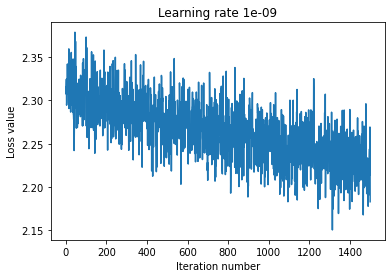

iteration 0 / 1500: loss 2.301558269842686
iteration 100 / 1500: loss 2.3144257603994083
iteration 200 / 1500: loss 2.299615054145751
iteration 300 / 1500: loss 2.202349824630768
iteration 400 / 1500: loss 2.1425722499221576
iteration 500 / 1500: loss 2.16118159258174
iteration 600 / 1500: loss 2.1246750520565865
iteration 700 / 1500: loss 2.0868451522465246
iteration 800 / 1500: loss 2.180350446126716
iteration 900 / 1500: loss 2.04337826151254
iteration 1000 / 1500: loss 2.0388645577564786
iteration 1100 / 1500: loss 2.002178796839264
iteration 1200 / 1500: loss 2.0350694958442137
iteration 1300 / 1500: loss 2.0592162866706283
iteration 1400 / 1500: loss 2.059259233525585


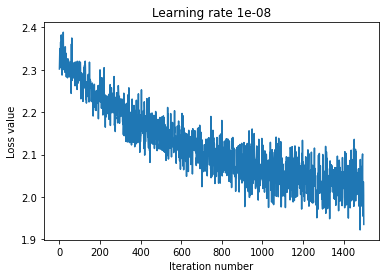

iteration 0 / 1500: loss 2.34172320479707
iteration 100 / 1500: loss 2.047545327270188
iteration 200 / 1500: loss 1.9199523279695212
iteration 300 / 1500: loss 1.9815970423392106
iteration 400 / 1500: loss 1.9313239499738306
iteration 500 / 1500: loss 1.9239798729614617
iteration 600 / 1500: loss 1.955881810097388
iteration 700 / 1500: loss 1.919345831356278
iteration 800 / 1500: loss 1.8878658598972344
iteration 900 / 1500: loss 1.8791343213336587
iteration 1000 / 1500: loss 1.8732284486109267
iteration 1100 / 1500: loss 1.861447187873149
iteration 1200 / 1500: loss 1.875169546073804
iteration 1300 / 1500: loss 1.7931037829688208
iteration 1400 / 1500: loss 1.8107226594397696


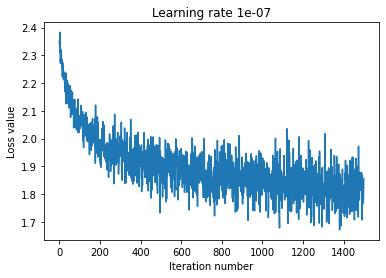

iteration 0 / 1500: loss 2.361311170397233
iteration 100 / 1500: loss 1.8623826588526387
iteration 200 / 1500: loss 1.6754688467303098
iteration 300 / 1500: loss 1.7766357678552693
iteration 400 / 1500: loss 1.7130979288812562
iteration 500 / 1500: loss 1.7374262843837438
iteration 600 / 1500: loss 1.717260477418457
iteration 700 / 1500: loss 1.8509371436430155
iteration 800 / 1500: loss 1.6900415473814348
iteration 900 / 1500: loss 1.7829100096014263
iteration 1000 / 1500: loss 1.7774664882691285
iteration 1100 / 1500: loss 1.7588985951715475
iteration 1200 / 1500: loss 1.5997328170630247
iteration 1300 / 1500: loss 1.6270945680595623
iteration 1400 / 1500: loss 1.6573848586400275


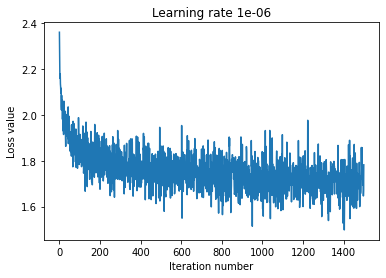

iteration 0 / 1500: loss 2.323211968721636
iteration 100 / 1500: loss 4.201931420199259
iteration 200 / 1500: loss 3.6791562987508826
iteration 300 / 1500: loss 1.9797973459114881
iteration 400 / 1500: loss 2.0538142152130416
iteration 500 / 1500: loss 2.7492326456774023
iteration 600 / 1500: loss 3.427756155779169
iteration 700 / 1500: loss 2.7390209168213073
iteration 800 / 1500: loss 2.6446593532460856
iteration 900 / 1500: loss 3.794760753068583
iteration 1000 / 1500: loss 2.635906572057845
iteration 1100 / 1500: loss 2.6376731162877416
iteration 1200 / 1500: loss 3.094353711009818
iteration 1300 / 1500: loss 2.1242650488815733
iteration 1400 / 1500: loss 3.5726884735985767


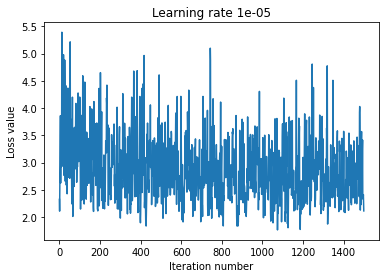

The best learning rate is 1e-06
The best validation accuracy for this learning rate is 0.414
The error rate on the test set is 0.605


In [ ]:

# Let us train the Softmax classifier with different learning rates and 
# evaluate on the validation data.

learning_rates = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
validation_accuracy = []
error_rate_test = []

for learning_rate in learning_rates:
  loss_hist = softmax.train(X_train, y_train, learning_rate=learning_rate,
                      num_iters=1500, verbose=True)
  
  plt.plot(loss_hist)
  plt.title('Learning rate {}'.format(learning_rate))
  plt.xlabel('Iteration number')
  plt.ylabel('Loss value')
  plt.show()

  y_val_pred = softmax.predict(X_val)
  validation_accuracy.append(np.mean(np.equal(y_val, y_val_pred)), )
  y_test_pred = softmax.predict(X_test)
  error_rate_test.append(1 - np.mean(np.equal(y_test, y_test_pred)), )

index_best = np.argmax(validation_accuracy)
print("The best learning rate is {}".format(learning_rates[index_best]))
print("The best validation accuracy for this learning rate is {}".format(validation_accuracy[index_best]))
print("The error rate on the test set is {}".format(error_rate_test[index_best]))

